We will create a simple RNN model to predict the future value of time-series data

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#Generate sample sequential data
def create_sine_wave_dataset(seq_length=100):
    x = np.linspace(0, 50, seq_length)
    y = np.sin(x)
    return y
data = create_sine_wave_dataset()
time_steps = np.arange(len(data))

In [9]:
#Prepare the dataset
def prepare_data(data, time_steps, time_window):
    X,aY = [], []
    for i in range(len(data) - time_window):
        X.append(data[i:i + time_window])
        Y.append(data[i + time_window])
    return np.array(X), np.array(Y)
time_window=10
X, Y = prepare_data(data, time_steps, time_window)

In [10]:
#Reshape the data to match RNN input shape
X = X.reshape((X.shape[0], X.shape[1], 1))

#Build the RNN 
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_window, 1)), Dense(1)
])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086      
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0470e-04 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6695e-04
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5586e-04
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2160e-04
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0730e-04
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2207e-04
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5871e-05
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3366e-05
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5570e-05
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3933e-05
E

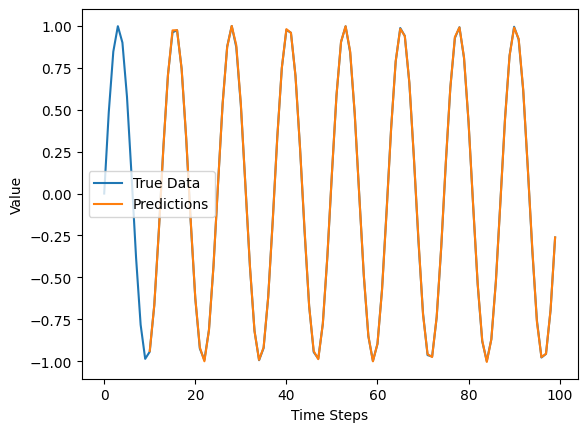

In [12]:
#Compile and train the model 
model.compile(optimizer='adam', loss='mse')

#Train the model 
model.fit(X, Y, epochs=20, batch_size=16)

#Make prediction
predictions= model.predict(X)

#Plot results
import matplotlib.pyplot as plt

plt.plot(time_steps, data, label='True Data')
plt.plot(time_steps[time_window:], predictions, label='Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()